## Линейная регрессия

In [4]:
import pandas

#### 2 столбца

In [52]:
data = pandas.read_csv('Advertising.csv')

data.drop(data.columns[[0]], axis=1, inplace=True)

data_2 = data[['TV', 'radio']]

print(data_2.head())

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data_2, data['sales'], test_size=0.3, random_state=42)

linear_regression_2 = LinearRegression()

model = linear_regression_2.fit(X_train, y_train)

predict = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, predict)}')
print(model.coef_)

      TV  radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8
MSE: 3.6690470545306813
[0.04407736 0.20260566]


#### 3 столбца

In [50]:
data_3 = data[['TV', 'radio', 'newspaper']]

print(data_3.head())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_3, data['sales'], test_size=0.3, random_state=42)

linear_regression_3 = LinearRegression()

model = linear_regression_3.fit(X_train, y_train)

predict = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, predict)}')
print(model.coef_)

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
MSE: 3.796797236715221
[0.04405928 0.1992875  0.00688245]


In [30]:
data_4 = data[['TV', 'newspaper', 'radio', 'sales']]

print(data_4.head())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_2, data['sales'], test_size=0.3, random_state=42)

      TV  newspaper  radio  sales
0  230.1       69.2   37.8   22.1
1   44.5       45.1   39.3   10.4
2   17.2       69.3   45.9    9.3
3  151.5       58.5   41.3   18.5
4  180.8       58.4   10.8   12.9


## Линейная регрессия с полиномами в качестве базисных функций

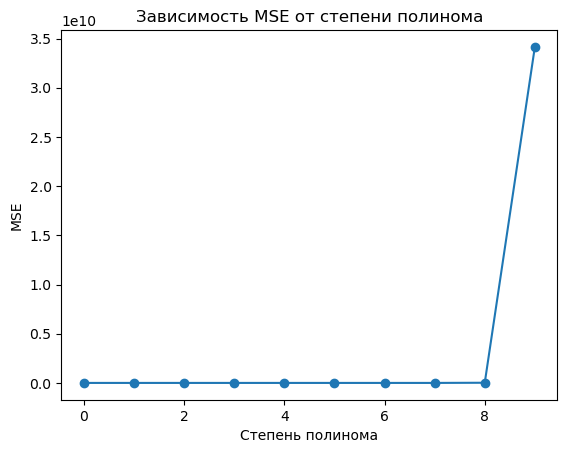

In [72]:
from sklearn.preprocessing import PolynomialFeatures

mses = []
pows = []

iter_count = 10

for i in range(iter_count):
    polynomial_3 = poly = PolynomialFeatures(i)
    
    X_polynomial_3 = polynomial_3.fit_transform(data_3)
    
    X_train, X_test, y_train, y_test = train_test_split(X_polynomial_3, data['sales'], test_size=0.3, random_state=42)
    
    linear_regression_3 = LinearRegression()
    
    model = linear_regression_3.fit(X_train, y_train)
    
    predict = model.predict(X_test)

    mses.append(mean_squared_error(y_test, predict))
    pows.append(i)

import matplotlib.pyplot as plt

plt.plot(pows, mses, marker='o')

plt.xlabel('Степень полинома')
plt.ylabel('MSE')

plt.title('Зависимость MSE от степени полинома')

plt.show()

## Регуляризация и гребневая регрессия

[28.320512444444436]
Оптимальная степень полинома: 0 с средним MSE: 28.320512444444436
[28.320512444444436, 2.8783320508152457]
Оптимальная степень полинома: 1 с средним MSE: 2.8783320508152457
[28.320512444444436, 2.8783320508152457, 0.3907863168595746]
Оптимальная степень полинома: 2 с средним MSE: 0.3907863168595746
[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01756e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16995e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.34516e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.5466e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ri

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.3095e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07037e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.23066e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41496e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ri

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393, 62.18484224654033]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.67697e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.82665e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01485e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16683e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_r

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393, 62.18484224654033, 394.7247962942368]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.60264e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.53935e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.35792e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.30105e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_r

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393, 62.18484224654033, 394.7247962942368, 45408.10255861279]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklea

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393, 62.18484224654033, 394.7247962942368, 45408.10255861279, 6005.848423897872]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Aleksei\anaconda3\Lib\site-packages\sklea

[28.320512444444436, 2.8783320508152457, 0.3907863168595746, 0.24485708082669688, 0.4309849435417393, 62.18484224654033, 394.7247962942368, 45408.10255861279, 6005.848423897872, 3642.8905719101003]
Оптимальная степень полинома: 3 с средним MSE: 0.24485708082669688


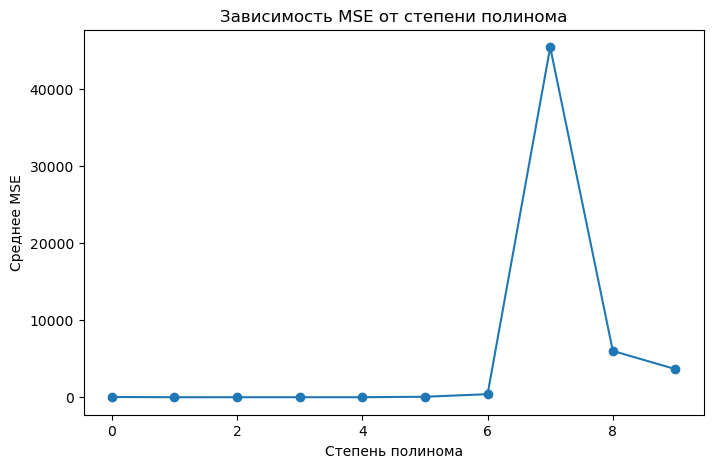

In [118]:
import numpy as np
from sklearn.linear_model import Ridge

alpha_values = np.logspace(-3, 3, 100)

best_degree = None
best_mse = float('inf')
best_mse_values = []
alphas = []

for i in range(iter_count):
    poly = PolynomialFeatures(i)
    
    X_poly = poly.fit_transform(data_3)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, data['sales'], random_state=42)
        
    ridge_mse_values = []
    ridge_coef_max = []
        
    for alpha in alpha_values:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
            
        mse = mean_squared_error(y_test, y_pred)

        ridge_mse_values.append(mse)
        ridge_coef_max.append(np.max(np.abs(ridge.coef_)))
        
    avg_mse = np.mean(ridge_mse_values)
    best_mse_values.append(avg_mse)

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_degree = i
    
    print(best_mse_values)

    pows.append(i)

    
    
    print(f'Оптимальная степень полинома: {best_degree} с средним MSE: {best_mse}')
    

plt.figure(figsize=(8, 5))

plt.plot(list(i for i in range(iter_count)), best_mse_values, marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Среднее MSE')
plt.title('Зависимость MSE от степени полинома')
plt.show()

#### Выбор оптимальной степени полинома

#### График зависимости максимального модуля параметров и MSE от величины alpha

## Регуляризация и лассо

#### Выбор оптимальной степени полинома

#### График зависимости максимального модуля параметров и MSE от величины alpha

## SVR (SVM for numerical values)

#### Исследование точности модкли при использовании ядерных функций poly и sigmoid

#### Модель SVR, учитывающая все характеристики исходных данных

#### Выбор модели с оптимальными параметрами